# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando el tipo de gráfica que consideres más adecuado (podéis ponerle fantasía a las gráficas ;-):

1.	¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2.	¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3.	¿Cuál es la distribución de los clientes por provincia o estado?
4.	¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5.	¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6.	¿Cómo se distribuyen los clientes según su estado civil y género?


In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [168]:
df_information = pd.read_csv("csv/customer_information_airline_merged.csv", index_col = 0)
df_information.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [169]:
df_information.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  country                      405624 non-null  object 
 11  province                     405624 non-null  object 
 12  city                         405624 non-null  object 
 13  post

##### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [ ]:
# identificamos que las variables que necesitamos son :
   # year tenemos 2 años 2017 y 2018
   # month
   # flights_booked

#son variables numericas


In [170]:
#filtramos el data frame por año 2017
df_2017 = df_information[df_information['year'] == 2017][["year", 'month', 'flights_booked']]
df_2017


,year,month,flights_booked
0,2017,1,3
1,2017,2,2
3,2017,4,4
4,2017,5,0
5,2017,6,4
...,...,...,...
405607,2017,8,0
405608,2017,9,0
405609,2017,10,0
405610,2017,11,0


In [171]:
# agrupamos vuelos reservados por mes 
vuelos_reservados_mes_2017 = df_2017.groupby("month")["flights_booked"].sum().reset_index()
vuelos_reservados_mes_2017

,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


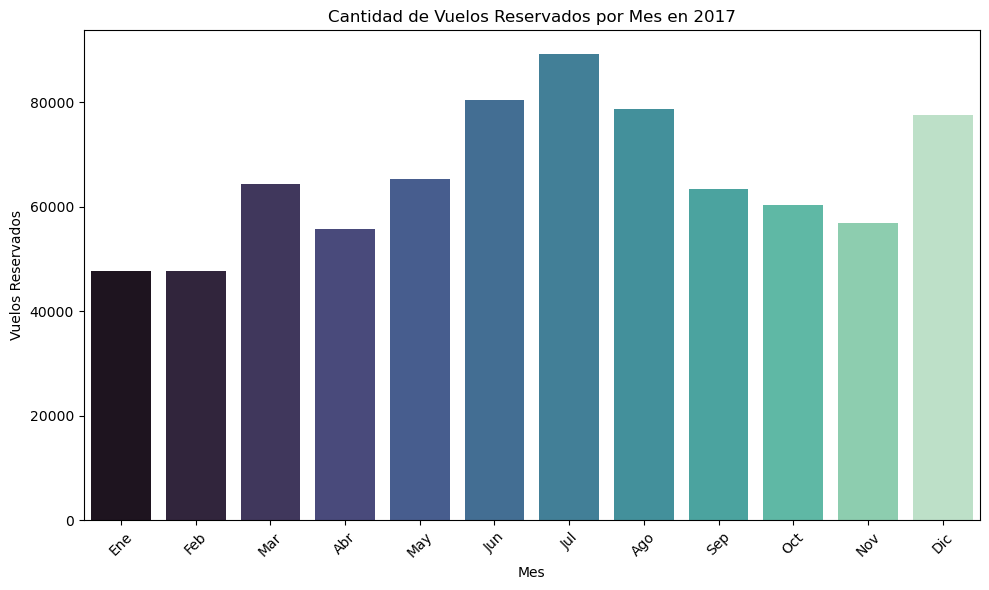

In [172]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', 
            y='flights_booked',
            data=vuelos_reservados_mes_2017,
            palette='mako')

# Añadimos etiquetas y título
plt.title('Cantidad de Vuelos Reservados por Mes en 2017')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [173]:
#filtramos el data frame por año 2018
df_2018 = df_information[df_information['year'] == 2018][["year", 'month', 'flights_booked']]
df_2018

,year,month,flights_booked
2,2018,10,6
12,2018,1,1
14,2018,3,7
15,2018,2,6
16,2018,4,5
...,...,...,...
405619,2018,8,0
405620,2018,9,0
405621,2018,10,0
405622,2018,11,0


In [174]:
#filtramos el data frame por año 2018
vuelos_reservados_mes_2018 = df_2018.groupby("month")["flights_booked"].sum().reset_index()
vuelos_reservados_mes_2018

,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


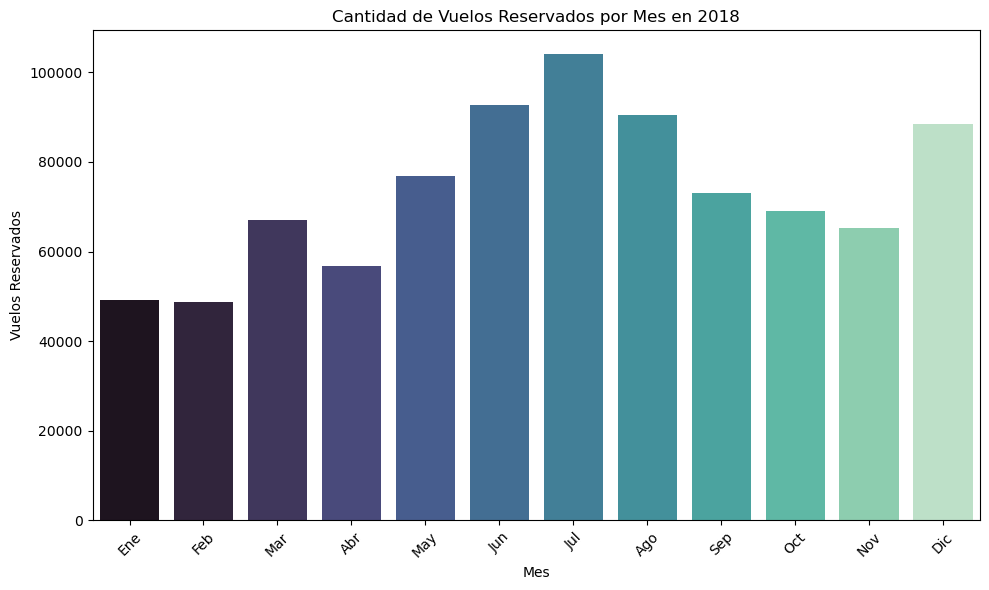

In [175]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', 
            y='flights_booked',
            data= vuelos_reservados_mes_2018,
            palette='mako')

# Añadimos etiquetas y título
plt.title('Cantidad de Vuelos Reservados por Mes en 2018')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

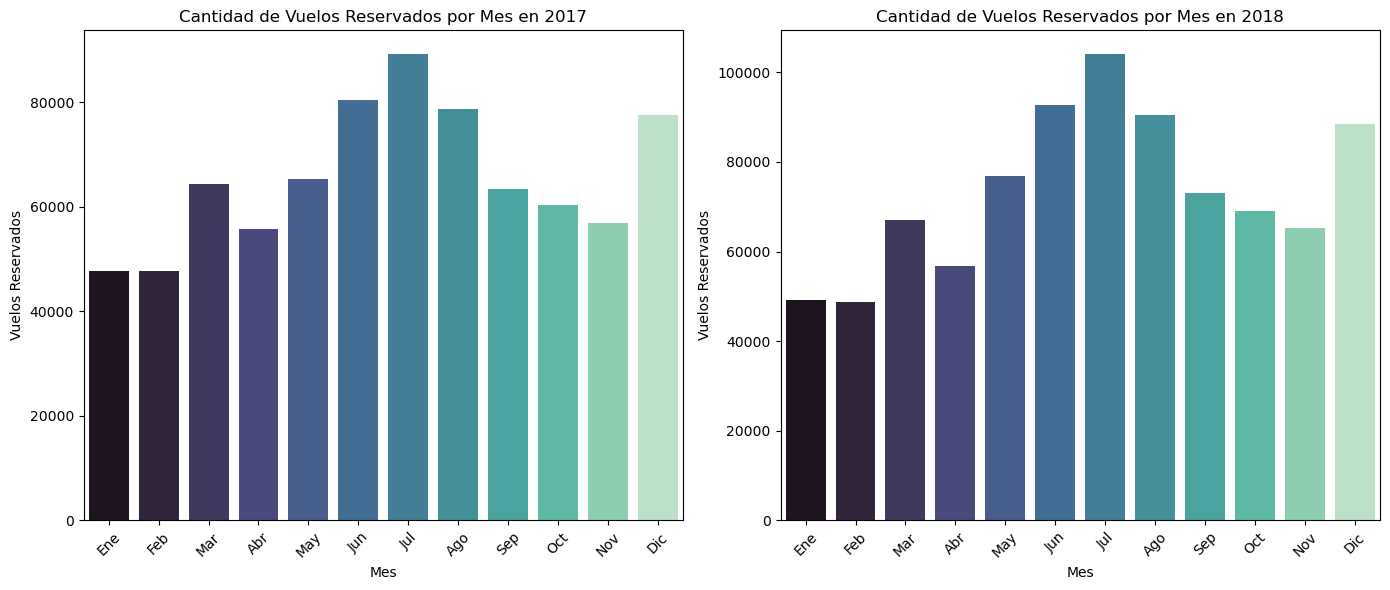

In [176]:
# como ya tengo los 2 graficos de 2017 y 2018 ahora quiero compararlos

# Crear las subgráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico para 2017
sns.barplot(x='month', y='flights_booked', data= vuelos_reservados_mes_2017, ax=axes[0], palette='mako')
axes[0].set_title('Cantidad de Vuelos Reservados por Mes en 2017')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Vuelos Reservados')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Gráfico para 2018
sns.barplot(x='month', y='flights_booked', data= vuelos_reservados_mes_2018, ax=axes[1], palette='mako')
axes[1].set_title('Cantidad de Vuelos Reservados por Mes en 2018')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Vuelos Reservados')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Ajustar el diseño
plt.tight_layout()
plt.show()


Se observa que los vuelos reservados por mes tanto para 2017 como para 2018 tienen un aumento en los meses de verano junio, julio y agosto, y final de año en diciembre ambas graficas son bastante similares pero se oberva un repunte de reservas en el año 2018.

### 2.	¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [177]:
#filtramos el data frame por distancia de vuelos y puntos acumulados
df_distancia_puntos = df_information[["distance", "points_accumulated"]].reset_index()
df_distancia_puntos


,index,distance,points_accumulated
0,0,1521,152.0
1,1,1320,132.0
2,2,3110,311.0
3,3,924,92.0
4,4,0,0.0
...,...,...,...
405619,405619,0,0.0
405620,405620,0,0.0
405621,405621,0,0.0
405622,405622,0,0.0


Text(0, 0.5, 'Puntos acumulados')

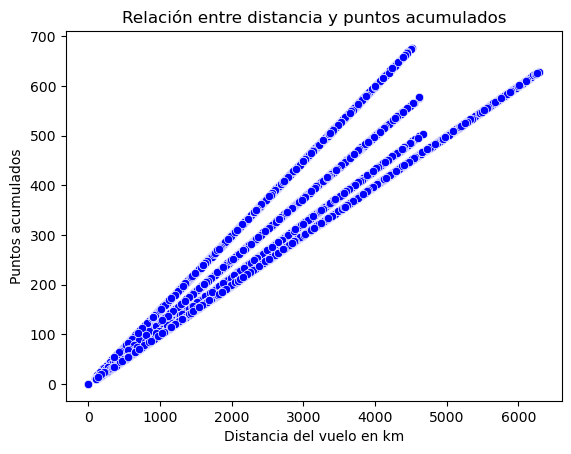

In [178]:
# usaremos el grafico de dispersion scarplot para mostrar la relacion entre 2 variables numericas
# distance y points_accumulated

sns.scatterplot(x = "distance",
                y = "points_accumulated",
                data = df_distancia_puntos,
                color= "blue"
                )

# Añadimos etiquetas y título
plt.title('Relación entre distancia y puntos acumulados')
plt.xlabel('Distancia del vuelo en km')
plt.ylabel("Puntos acumulados")



In [179]:
## calculamos la correlación entre las variables Distancia y Puntos Acumulados:
correlacion = df_distancia_puntos['distance'].corr(df_distancia_puntos['points_accumulated'])
print(f'Coeficiente de correlación: {correlacion}')

# El coeficiente de relación es muy próximo a 1, que significa que las dos variables itenen una 'Correlación Fuerte'.

Coeficiente de correlación: 0.994563721153131


Conclusiones: 
El coeficiente de relación es muy próximo a 1, las dos variables tienen una 'Correlación Fuerte'
En general hay una relacion lineal positiva cuantos mas km mas puntos se acumulan.
Se observan varias lineas que hacen referencia a los distintos programas de lealtad y a las condiciones de cada uno ya que los puntos acumulados puede deberse a vuelos en temporada alta o baja, la clase de vuelo si es primera o segunda etc.. 


### 3. ¿Cuál es la distribución de los clientes por provincia o estado?


In [180]:
#filtramos el data frame por clientes y provincia

df_clientes_provincia = df_information.groupby("province")["loyalty_number"].count().reset_index()
df_clientes_provincia

,province,loyalty_number
0,Alberta,23400
1,British Columbia,106848
2,Manitoba,15984
3,New Brunswick,15432
4,Newfoundland,6312
5,Nova Scotia,12576
6,Ontario,130896
7,Prince Edward Island,1584
8,Quebec,79968
9,Saskatchewan,9936


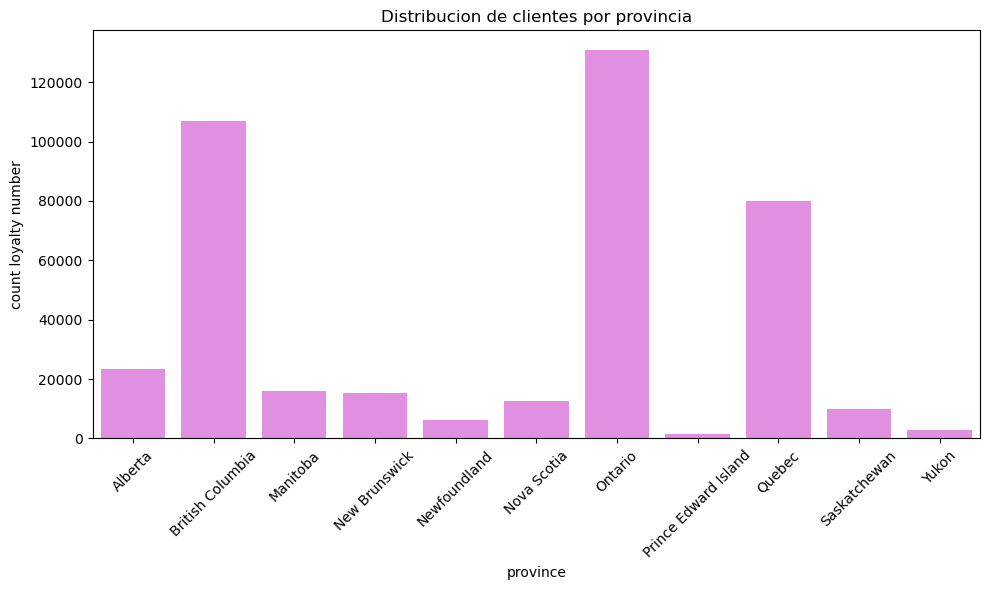

In [181]:
#usamos un barplot
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='province', 
            y='loyalty_number',
            data= df_clientes_provincia,
            color='violet')

# Añadimos etiquetas y título
plt.title('Distribucion de clientes por provincia')
plt.xlabel('province')
plt.ylabel('count loyalty number')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(11), labels=['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones:

La mayoria de clientes se concentran en provincias como British Columbia y Ontario, después destaca Quebec, también se debe a que estas provicias son mas grandes y concentran mas cantidad de población, por lo tanto esto trae consigo mas clientes, en el lado contrario tenemos a Prince y Yukon que son las provincias de menor poblacion por lo se traduce en menos clientes.

#### 4.	¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [182]:
# filtramos nuestro data frame por nivel educativo y salario 
# tenemos los siguientes niveles educativos : 'High School', 'College', 'Bachelor', 'Master', 'Doctor'

salario_promedio = df_information.groupby("education")["salary"].mean().round(2).reset_index()
salario_promedio

,education,salary
0,Bachelor,72601.24
1,College,71786.84
2,Doctor,178335.44
3,High School or Below,61112.38
4,Master,103767.49


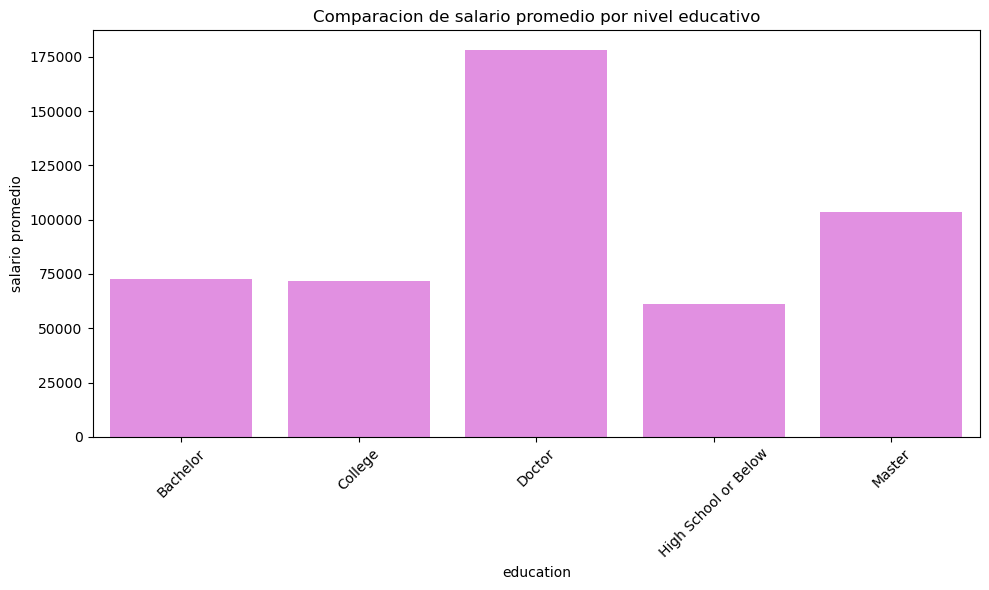

In [183]:
#usamos un barplot
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='education', 
            y='salary',
            data= salario_promedio,
            color='violet')

# Añadimos etiquetas y título
plt.title('Comparacion de salario promedio por nivel educativo')
plt.xlabel('education')
plt.ylabel('salario promedio')

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(5), labels=['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones:
Se refleja que a mayor nivel educativo mayores ingresos como los niveles de Doctor que supera con creces los demas le sigue Master y por el lado opuesto el nivel educativo mas bajo High School con menores ingresos.

#### 5.	¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [184]:
# variables a tener en cuenta
# loyalty_card

In [185]:
df_information["loyalty_card"].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [186]:
# comprobamos el numero y el  porcentaje de los tipos de tarjetas : Aurora, Nova y Star 
tipos_card = df_information["loyalty_card"].value_counts()
porcentaje_card = ((tipos_card / tipos_card.sum()) * 100).round(2)
print(f"El total para cada tarjeta: {tipos_card}\n")
print(f"El porcentaje para cada tarjeta: {porcentaje_card}")

El total para cada tarjeta: loyalty_card
Star      184224
Nova      137568
Aurora     83832
Name: count, dtype: int64

El porcentaje para cada tarjeta: loyalty_card
Star      45.42
Nova      33.92
Aurora    20.67
Name: count, dtype: float64


In [187]:
# Agrupamos nuestros datos según el tipo de tarjeta de fidelización y los incluímos en un DataFrame:
df_tipos_tarjeta = df_information.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_tipos_tarjeta

,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


Text(0.5, 1.0, 'Proporción clientes por tipo de tarjeta')

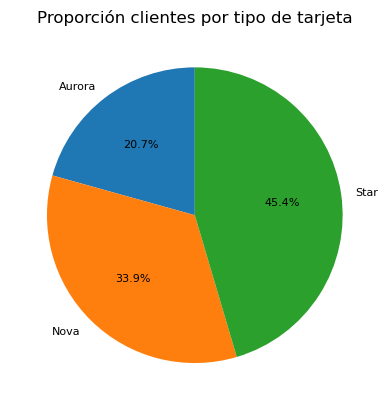

In [188]:
plt.pie("loyalty_number", 
        labels="loyalty_card",
        data = df_tipos_tarjeta,
        autopct = "%1.1f%%",
        textprops={"fontsize":8},
        startangle=90);
# Añadimos  título
plt.title('Proporción clientes por tipo de tarjeta')

Conclusiones:
Observamos que la tarjeta star es la que mas clientes tiene, por lo que es la mas contratada en contra de la tarjeta aurora que es la menos contratada

### 6.	¿Cómo se distribuyen los clientes según su estado civil y género?

In [189]:
# necesitamos filtra el data frame para ver los valores que necesitamos 

clientes = df_information.groupby(['marital_status', 'gender']).size().reset_index(name='clientes')
clientes

,marital_status,gender,clientes
0,Divorced,Female,30888
1,Divorced,Male,30288
2,Married,Female,117816
3,Married,Male,117984
4,Single,Female,54936
5,Single,Male,53712


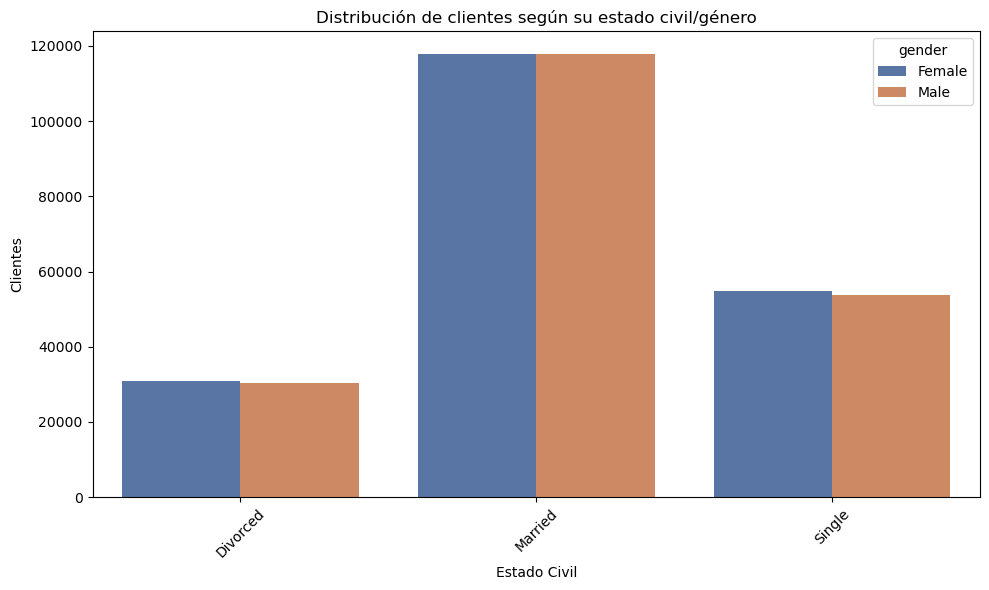

In [190]:
#usamos un barplot
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="marital_status", 
            y="clientes",
            data= clientes,
            hue="gender",
            palette="deep")

# Añadimos etiquetas y título
plt.title("Distribución de clientes según su estado civil/género")
plt.xlabel("Estado Civil")
plt.ylabel("Clientes")

# Añadimos etiquetas de los meses
plt.xticks(ticks=range(3), labels=["Divorced", "Married", "Single"], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones:
La distribución de los clientes teniendo en cuenta su genero masculino o femenino está muy igualada, pero en cambio si varia en el caso de que del estado civil, si el estado civil es casado hay mas clientes es decir puede que la unidad familiar unida tiene mas poder adquisitivo que los solteros o divorciados. 